In [1]:
import os, sys

In [2]:
base_dir = os.path.split(os.getcwd())[0]
os.chdir(os.path.join(base_dir,'core'))

In [3]:
import pickle as pk

import numpy as np
import cv2
import sys
import argparse
import time
import copy
import datetime

import matplotlib.pyplot as plt

from utils import ARUCO_DICT, display_pose
from estimators import PoseSingle

In [4]:
from scipy.spatial.transform import Rotation as R

In [10]:
k_matrix = "../calib/calibration_matrix_render_calib.npy"
d_coeff = "../calib/distortion_coefficients_render_calib.npy"
m_dict = "../demo_tags/marker_poses.pk"
edge_len = 0.7
marker_step = 8
n_markers = 100

type_ = "DICT_7X7_100"

if ARUCO_DICT.get(type_, None) is None:
    print(f"ArUCo tag type '{type_}' is not supported")
    sys.exit(0)

aruco_dict_type = ARUCO_DICT[type_]
calibration_matrix_path = k_matrix
distortion_coefficients_path = d_coeff
marker_dict_path = m_dict


k = np.load(calibration_matrix_path)
d = np.load(distortion_coefficients_path)

with open(marker_dict_path,'rb') as f:
    marker_dict = pk.load(f)

estimator = PoseSingle(aruco_dict_type,
                       1,
                       n_markers,
                       marker_step,
                       edge_len,
                       k,
                       d)

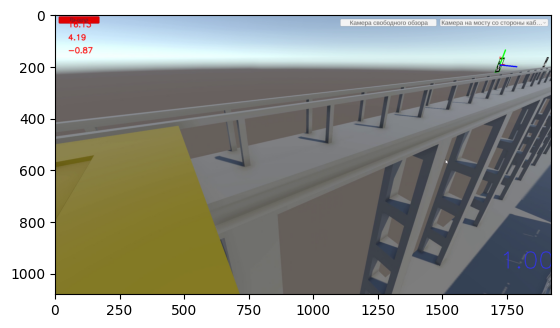

[[ 0.78756816 -0.22770041  0.57261585 16.12615445]
 [ 0.61374137  0.37322408 -0.69571928  4.19200359]
 [-0.05529846  0.89936439  0.43368856 -0.86780661]
 [ 0.          0.          0.          1.        ]]


In [11]:
# Test on single image
image = "../data/render_distance/frames_front/481.png"

image = cv2.imread(image)
time.sleep(.1)

# output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plt.imshow(output)
# plt.show()

frame, pose, size = estimator(image, True)

output = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

output = display_pose(output, pose[:-1,[3]])

plt.imshow(output)
plt.show()
print(pose)

486
[[[-2.55894644  0.08444849 -0.65008989]]]
[[[12.31528054 -4.21812167 12.78191213]]]


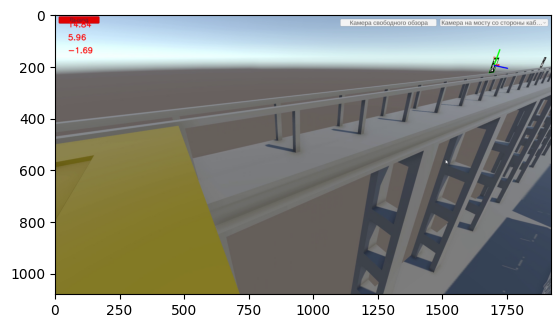

[[ 0.88436643 -0.1761347   0.43228763 14.8403593 ]
 [ 0.46294442  0.44962453 -0.76388497  5.9591911 ]
 [-0.05982047  0.87567936  0.47917342 -1.69432448]
 [ 0.          0.          0.          1.        ]]
487
[[[ 1.76226649  0.62655442 -2.52748807]]]
[[[12.41478737 -4.27133363 12.99677584]]]


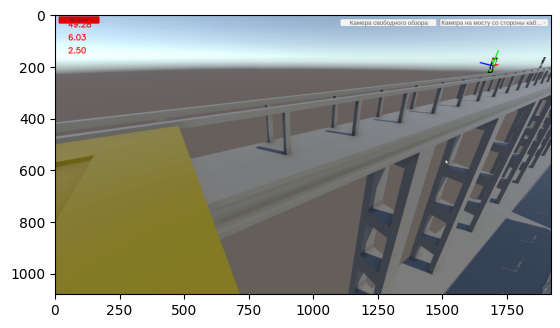

[[-0.37174076  0.22551077 -0.90052968 49.28229661]
 [-0.90158111 -0.31891172  0.29231288  6.03163445]
 [-0.22126976  0.92056516  0.32186874  2.49580214]
 [ 0.          0.          0.          1.        ]]


In [7]:
# Test on multiple images
for i in range(486,488):
    print(i)
    image = cv2.imread(f"../data/render_distance/frames_front/{i}.png")
    time.sleep(.1)
    
    # output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # plt.imshow(output)
    # plt.show()
    
    frame, pose, dt, size = estimator(image, "now", True)
    
    output = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    try:
        output = display_pose(output, pose[:-1,[3]])
    except: continue
    plt.imshow(output)
    plt.show()
    print(pose)
    

In [8]:
np.linalg.det([
    [ 0.88436643,  0.05984192,  0.46294165],
    [-0.1761347,  -0.87565853,  0.4496651 ],
    [ 0.43228763, -0.4792088,  -0.76386277]]
             )

1.0000000027546723

In [9]:
np.linalg.det([
    [-0.37174076,  0.22122799, -0.90159136],
    [ 0.22551077, -0.92057993, -0.31886907],
    [-0.90052968, -0.32185519,  0.29232779]]
)

1.000000000018026

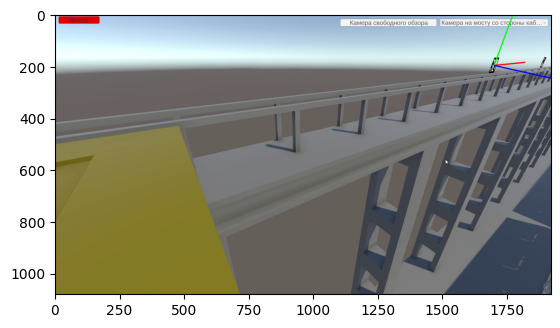

In [10]:
image = cv2.imread(f"../data/render_distance/frames_front/486.png")

img = cv2.aruco.drawAxis(
    image, 
    k, 
    d, 
    rvec=np.array([[[-2.55894644,  0.08444849, -0.65008989]]]), 
    tvec=np.array([[[12.31528054, -4.21812167, 12.78191213]]]),
    length=5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [11]:
r = R.from_rotvec([-2.55894644,  0.08444849, -0.65008989])
mtx = np.vstack([np.column_stack([r.as_matrix(), [12.31528054, -4.21812167, 12.78191213]]), [0, 0, 0, 1]])
mtx

array([[ 0.88436642,  0.05984192,  0.46294165, 12.31528054],
       [-0.1761347 , -0.87565853,  0.4496651 , -4.21812167],
       [ 0.43228763, -0.4792088 , -0.76386277, 12.78191213],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
np.linalg.det(mtx[:3,:3])

0.9999999999999989

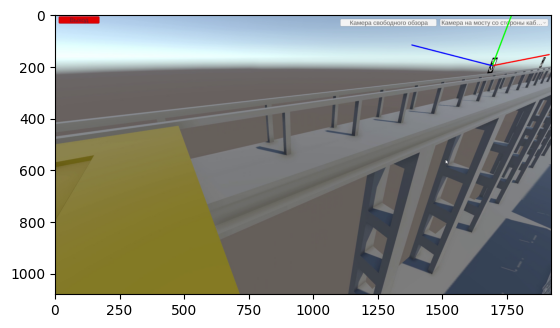

In [13]:
image = cv2.imread(f"../data/render_distance/frames_front/487.png")

img = cv2.aruco.drawAxis(
    image, 
    k, 
    d, 
    rvec=np.array([[[ 1.76226649,  0.62655442, -2.52748807]]]), 
    tvec=np.array([[[12.41478737, -4.27133363, 12.99677584]]]),
    length=5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
r = R.from_rotvec([1.76226649,  0.62655442, -2.52748807])
mtx = np.vstack([np.column_stack([r.as_matrix(), [12.41478737, -4.27133363, 12.99677584]]), [0, 0, 0, 1]])
mtx

array([[-0.37174076,  0.22122799, -0.90159136, 12.41478737],
       [ 0.22551077, -0.92057993, -0.31886907, -4.27133363],
       [-0.90052967, -0.3218552 ,  0.29232779, 12.99677584],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [15]:
np.linalg.det(mtx[:3,:3])

0.9999999999999998

In [16]:
# np.save("camera_matrix_video.npy", k_video)

In [17]:
# cap = cv2.VideoCapture('../data/hikvision/demo1/r.mp4')

In [18]:
# width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)/10)
# length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# estimator_video = PoseSingle(
#     aruco_dict_type,
#     n_markers,
#     marker_step,
#     edge_len,
#     k,
#     d
# )

# out = cv2.VideoWriter('../data/results/hikvision_r_weighted_flip.mov', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))

In [19]:
# if (cap.isOpened()== False): 
#   print("Error opening video stream or file")

# while(cap.isOpened()):
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     if ret == True:
#         frame, pose, dt, size = estimator_video(frame, "now", True)
#         # print(type(pose))
#         output = frame#cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         # print(pose.shape==())
#         if pose.shape!=():
#             output = display_pose(output, pose[:-1,[3]])
        
#         out.write(output)
#   # Break the loop
#     else: 
#         break

# cap.release()
# out.release()